### Importação dos dados



In [83]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

#1. Análise do faturamento



In [84]:
dados1 = pd.read_csv(url, sep=',')
dados2 = pd.read_csv(url2, sep=',')
dados3 = pd.read_csv(url3, sep=',')
dados4 = pd.read_csv(url4, sep=',')

dados_lojas = {
    'Loja 1': dados1,
    'Loja 2': dados2,
    'Loja 3': dados3,
    'Loja 4': dados4
}

def formatar_real(valor):
    return f'R$ {valor:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')

def formatar_series_real(series):
    return series.apply(formatar_real)

In [85]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
valores = [
    dados1['Preço'].sum(),
    dados2['Preço'].sum(),
    dados3['Preço'].sum(),
    dados4['Preço'].sum()
]

faturamento = pd.Series(valores, index=lojas)

print('Faturamento por Loja:\n')
print(formatar_series_real(faturamento))

Faturamento por Loja:

Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
dtype: object


/tmp/ipython-input-858515458.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([formatar_real(x) for x in ax.get_yticks()])


<Axes: title={'center': 'Faturamento por Loja'}>

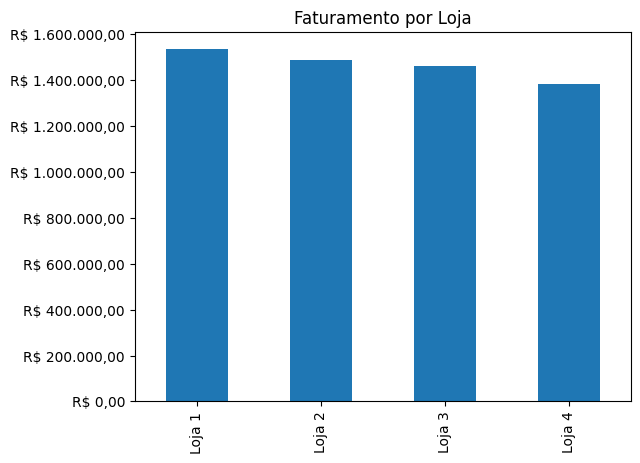

In [86]:
def grafico_faturamento_lojas(df):
    ax = df.plot(kind='bar', title='Faturamento por Loja')
    ax.set_yticklabels([formatar_real(x) for x in ax.get_yticks()])
    return ax

grafico_faturamento_lojas(faturamento)

# 2. Vendas por Categoria

In [87]:
def arrecadacao_por_categoria(lojas):

    lista_dfs = []

    for nome_loja, df in lojas.items():
        df_temp = df.copy()
        lista_dfs.append(df_temp)
        df_temp['Loja'] = nome_loja

    df_total = pd.concat(lista_dfs, ignore_index=True)

    tabela = df_total.pivot_table(
        values='Preço',
        index='Categoria do Produto',
        columns='Loja',
        aggfunc='sum',
        fill_value=0
    )

    return tabela

tabela = arrecadacao_por_categoria(dados_lojas)

print(tabela)

Loja                      Loja 1     Loja 2     Loja 3     Loja 4
Categoria do Produto                                             
brinquedos              23993.78   21262.21   25869.20   27015.67
eletrodomesticos       484913.36  464758.13  438984.89  377680.65
eletronicos            572659.23  547773.71  547699.92  545966.86
esporte e lazer         52387.55   46326.09   47456.10   44465.65
instrumentos musicais  121731.69  139987.03  103174.45  100136.50
livros                  11713.92   13454.35   12664.70   12427.77
moveis                 250178.11  235234.68  268095.56  256705.65
utilidades domesticas   16931.48   19662.86   20080.21   20098.83


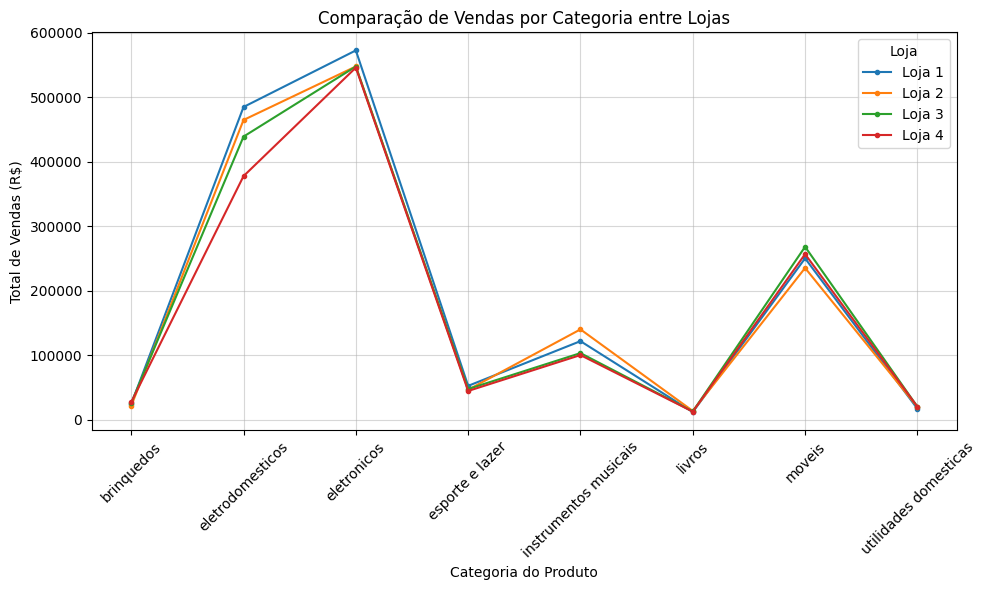

In [88]:

def plot_linhas_lojas(tabela):

    ax = tabela.plot(
        kind='line',
        marker='.',
        figsize=(10,6)
    )

    ax.set_xlabel('Categoria do Produto')
    ax.set_ylabel('Total de Vendas (R$)')
    ax.set_title('Comparação de Vendas por Categoria entre Lojas')

    plt.xticks(rotation=45)
    plt.grid(True, linestyle='-', alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_linhas_lojas(tabela)

# 3. Média de Avaliação das Lojas


In [89]:
def media_avaliacao_lojas(dados1, dados2, dados3, dados4):

    df_total = pd.concat(
        [dados1, dados2, dados3, dados4],
        keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        names=['Loja']
    )

    df_total['Avaliação da compra'] = pd.to_numeric(df_total['Avaliação da compra'], errors='coerce'
    )

    tabela = (
        df_total
        .groupby('Loja')['Avaliação da compra']
        .mean()
        .round(2)
        .to_frame('Média de Avaliação')
    )
    tabela['Média de Avaliação'] = tabela['Média de Avaliação'].map(lambda x: f"⭐ {x:.2f}")

    tabela.index.name = None

    return tabela


In [90]:
tabela_media = media_avaliacao_lojas(dados1, dados2, dados3, dados4)

print(tabela_media)

       Média de Avaliação
Loja 1             ⭐ 3.98
Loja 2             ⭐ 4.04
Loja 3             ⭐ 4.05
Loja 4             ⭐ 4.00


# 4. Produtos Mais e Menos Vendidos

In [91]:
def produtos_vendidos_por_tipo(dados1, dados2, dados3, dados4, tipo="mais vendidos"):

    df_total = pd.concat(
        [dados1, dados2, dados3, dados4],
        keys=['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        names=['Loja']
    ).reset_index(level=0)

    resultado = []

    for loja, grupo in df_total.groupby('Loja'):
        contagem = grupo['Produto'].value_counts()

        if tipo.lower() == "mais vendidos":
            produto = contagem.idxmax()
            qtd = contagem.max()
        elif tipo.lower() == "menos vendidos":
            produto = contagem.idxmin()
            qtd = contagem.min()
        else:
            raise ValueError('O parâmetro "tipo" deve ser "mais vendidos" ou "menos vendidos"')

        resultado.append({
            'Loja': loja,
            'Produto': produto,
            'Quantidade': qtd
        })

    tabela = pd.DataFrame(resultado)
    return tabela

In [92]:
tabela_mais = produtos_vendidos_por_tipo(dados1, dados2, dados3, dados4, tipo="mais vendidos")
tabela_menos = produtos_vendidos_por_tipo(dados1, dados2, dados3, dados4, tipo="menos vendidos")

def tabela_mais_menos_vendidos(tabela_mais, tabela_menos):

    tabela = pd.DataFrame({
        'Loja': tabela_mais['Loja'],
        'Produto Mais Vendido': tabela_mais['Produto'],
        'Qtd Mais Vendido': tabela_mais['Quantidade'],
        'Produto Menos Vendido': tabela_menos['Produto'],
        'Qtd Menos Vendido': tabela_menos['Quantidade']
    })

    return tabela


In [93]:
tabela_mais_menos_vendidos(tabela_mais, tabela_menos)


,Loja,Produto Mais Vendido,Qtd Mais Vendido,Produto Menos Vendido,Qtd Menos Vendido
0,Loja 1,Micro-ondas,60,Headset,33
1,Loja 2,Iniciando em programação,65,Jogo de tabuleiro,32
2,Loja 3,Kit banquetas,57,Blocos de montar,35
3,Loja 4,Cama box,62,Guitarra,33


# 5. Frete Médio por Loja

In [94]:
lojas = {
    'Loja 1': dados1,
    'Loja 2': dados2,
    'Loja 3': dados3,
    'Loja 4': dados4
}

medias_frete = {}

for nome, df in lojas.items():
    medias_frete[nome] = df['Frete'].mean()

df_medias = pd.DataFrame.from_dict(medias_frete, orient='index', columns=['Média do Frete'])
df_medias['Média do Frete'] = df_medias['Média do Frete']

print(df_medias.to_string(formatters={
    'Média do Frete': formatar_real
}))

       Média do Frete
Loja 1       R$ 34,69
Loja 2       R$ 33,62
Loja 3       R$ 33,07
Loja 4       R$ 31,28


<Axes: title={'center': 'Média do Frete'}, xlabel='Valor Médio do Frete', ylabel='Loja'>

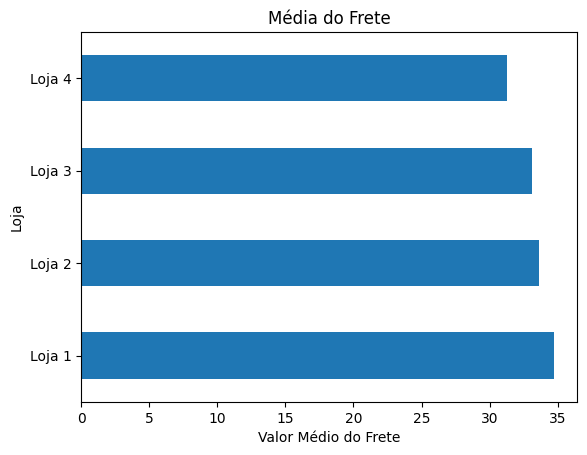

In [95]:
def grafico_frete_medio(series):
    ax = series.plot(kind='barh', title='Média do Frete', legend=False)
    ax.set_xlabel('Valor Médio do Frete')
    ax.set_ylabel('Loja')
    return ax


grafico_frete_medio(df_medias)

# Relatorio Final

##Objetivo

Neste relatório veremos uma analise para tomada de decisão mais precisa em analisar o desempenho das lojas e tomar uma decião com base nele.


###Faturamento total
 - Loja 1:   1.534.509,12
 - Loja 2:   1.488.459,06
 - Loja 3:   1.464.025,03
 - Loja 4:   1.384.497,58

⭐ Loja 1 possui o maior faturamento dentre todas as lojas observadas, porém, com uma margem pequena, nos proximos dados poderemos verificar se a mesma conseguiu essa margem pela quantidade de produtos vendidos ou pelo valor individual.
*texto em itálico*

###Categorias de produtos mais e menos vendidas

<img src="https://i.ibb.co/HfS2byPj/Captura-de-tela-2026-02-13-141742.jpg" height="300">

⭐Podemos ver na tabela que o produto com maior valor em vendas foram os eletronicos, onde a loja 1 teve aproximadamente uma arrecadação de 30 mil a mais que as demais lojas, podendo indicar que a mesma conseguiu seu faturamento superior devido a essa diferença, sendo que na "pior" categria de vendas da loja 1 performou uma diferença aproximada maxima de 18 mil.


###Media de avaliações

⭐ A média das lojas apresentaram uma difença insignificante ao compara-las, porém a Loja 3 possui a maior avaliação com uma média de 4.05 e a Loja 1 com a menor de 3.98

###Desempenho por categoria

⭐ <img src="https://i.ibb.co/NgjL0QrG/Captura-de-tela-2026-02-13-142918.jpg" height="300">


É possível observar na tabela que a Loja 2 possui a maior variação entre, possuindo o produto mais vendido quanto o menos vendido, porém, em números, todas elas tiveram produtos com "sucesso" e "fracasso" semelhantes.


###Frete médio

⭐ A Loja 4 possui atualmente a menor média de frete e o maior sendo a Loja 1
Vale a pena ressaltar que cada categoria de produto possui um valor de frete independente, portanto, a loja 4 pode ter a menor média mas um produto individual ainda pode ter um frete maior que de outras lojas.


#✅CONCLUSÂO

⭐ Analisando apenas os dados do desempenho a Loja 4 foi a que possuiu o pior desempenho no faturamento, e todos os outros aspectos a diferença entre a lojas posui uma diferença insignificante e a mesma posui a melhor avaliação do cliente e o menor frete médio.
Visando lucros, a venda da Loja 4 seria a melhor decisão e investir nas demais lojas para fortalecer os pontos fracos observados neste relatório.